# Dependencias

In [1]:
import pandas
import geopandas
from shapely import geometry
import matplotlib.pyplot as plt
import rioxarray
import osmnx

# Geotables

In [2]:
# Lectura de datos
gt_polygons = geopandas.read_file(
    "data/countries_clean.gpkg"
)

In [3]:
gt_polygons.head()
# Verifiquemos los tipos de geometrias, poligonos, multypoligonos, lineas, puntos. Donde puntos, lineas y poligonos son las formas base definidas en ISO 19125-1 

,ADMIN,geometry
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102..."
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101..."
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77..."
3,Bolivia,"POLYGON ((-7737827.685 -1979875.500, -7737828...."
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77..."


<Axes: >

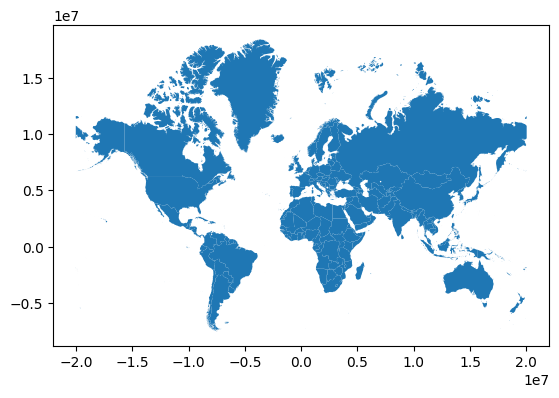

In [4]:
# Por defecto geopandas reconoce la columna con nombre geometry como la columna con información geoespacial,
# si hay mas de una columna con datos geoespaciales, deberiamos usar set_geometry()
gt_polygons.plot()

<Axes: >

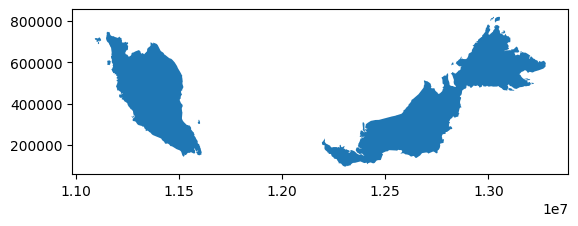

In [5]:
# Visualizamos un multipoligono
gt_polygons.query('ADMIN=="Malaysia"').plot()

### Calcular el centroide

In [6]:
gt_polygons["centroid"] = gt_polygons.geometry.centroid

In [7]:
gt_polygons.head()

,ADMIN,geometry,centroid
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102...",POINT (13055431.810 -248921.141)
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101...",POINT (12211696.493 422897.505)
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",POINT (-7959811.948 -4915458.802)
3,Bolivia,"POLYGON ((-7737827.685 -1979875.500, -7737828....",POINT (-7200010.945 -1894653.148)
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77...",POINT (-8277554.831 -1032942.536)


<Axes: >

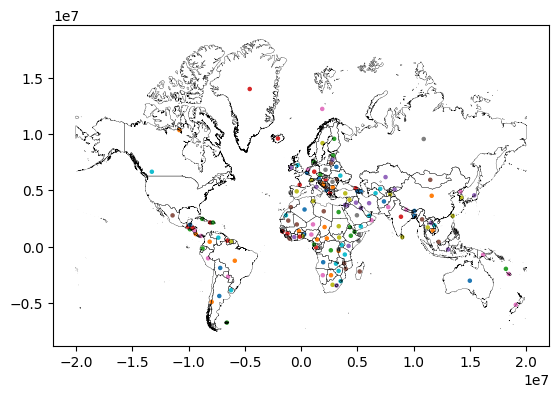

In [8]:
# Plot centroids
ax = gt_polygons.set_geometry("centroid").plot("ADMIN", markersize=5)
# Plot polygons without color filling
gt_polygons.plot(
    "ADMIN", ax=ax, facecolor="none", edgecolor="k", linewidth=0.2
)

## Calcular el área y el perímetro

In [9]:
gt_polygons["area"] = gt_polygons.geometry.area

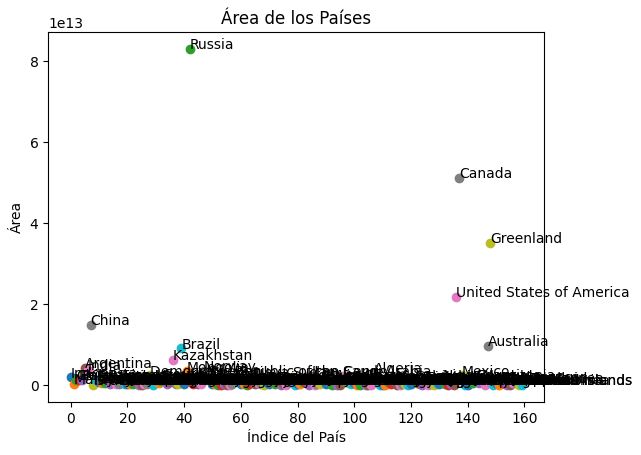

In [10]:
for idx, row in gt_polygons.iterrows():
    plt.scatter(x=idx, y=row['area'])
    plt.text(x=idx, y=row['area'], s=row['ADMIN'])

plt.title('Área de los Países')
plt.xlabel('Índice del País')
plt.ylabel('Área')
plt.show()

In [11]:
gt_polygons["length"] = gt_polygons.geometry.length

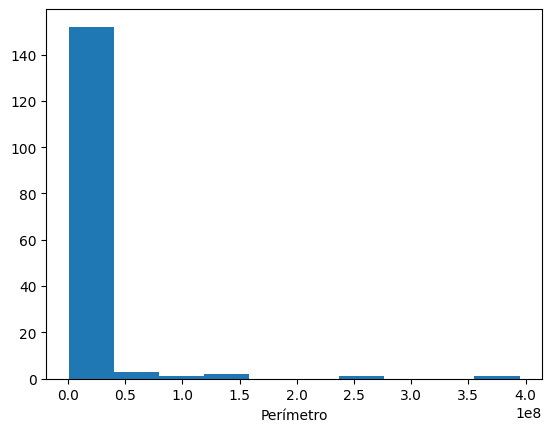

In [12]:
plt.hist(gt_polygons["length"])
plt.xlabel('Perímetro')
plt.show()

# Surfaces

In [13]:
# Leer los datos
pop = rioxarray.open_rasterio("data/ghsl_sao_paulo.tif")

In [14]:
type(pop)

xarray.core.dataarray.DataArray

In [15]:
# Coordenadas asociadas al raster
pop.coords

Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 4kB -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
  * y            (y) float64 3kB -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
    spatial_ref  int64 8B 0

In [16]:
# Dimensiones de los datos
pop.shape

(1, 416, 468)

In [17]:
pop.attrs

{'AREA_OR_POINT': 'Area',
 '_FillValue': -200.0,
 'scale_factor': 1.0,
 'add_offset': 0.0}

In [18]:
pop.sel(band=1)

<xarray.DataArray (y: 416, x: 468)> Size: 779kB
[194688 values with dtype=float32]
Coordinates:
    band         int64 8B 1
  * x            (x) float64 4kB -4.482e+06 -4.482e+06 ... -4.365e+06 -4.365e+06
  * y            (y) float64 3kB -2.822e+06 -2.822e+06 ... -2.926e+06 -2.926e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -200.0
    scale_factor:   1.0
    add_offset:     0.0

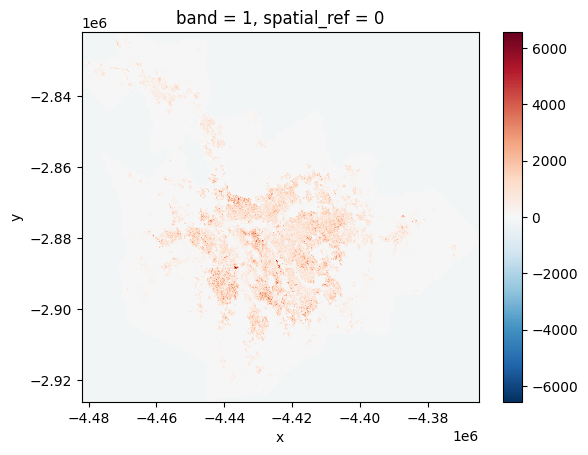

In [19]:
pop.sel(band=1).plot()

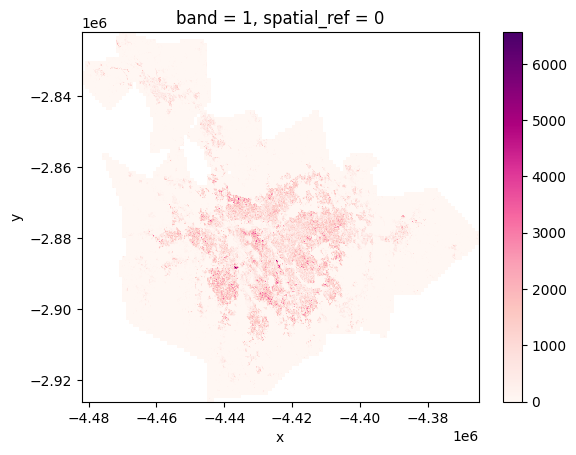

In [20]:
# Eliminar datos NaN que son tratados como -200
pop.where(pop != -200).sel(band=1).plot(cmap="RdPu")

# Grafos

In [21]:
graph = osmnx.graph_from_place("Yoyogi Park, Shibuya, Tokyo, Japan") # Conexión a los servidores de OpenStreetMap
#graph = osmnx.load_graphml("data/yoyogi_park_graph.graphml") # Archivo local

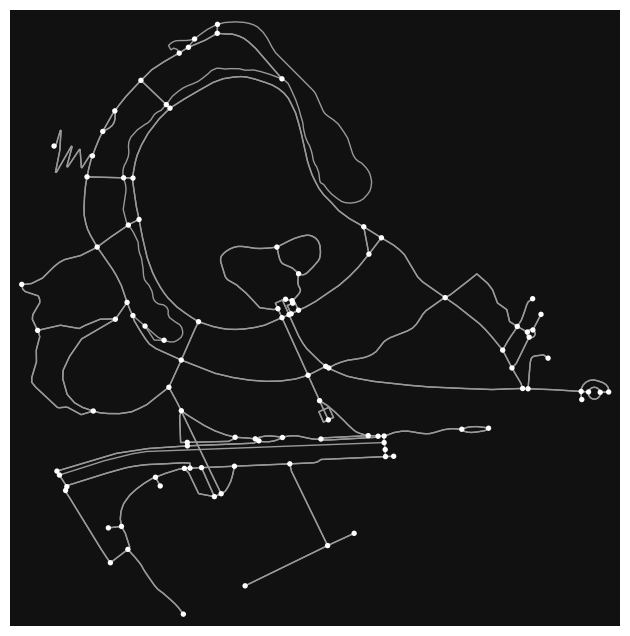

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [22]:
osmnx.plot_graph(graph)

In [23]:
# Numero de nodos
len(graph.nodes)

103

In [24]:
# Numero de aristas
len(graph.edges)

278

In [25]:
# Información de un nodo particular 
graph.nodes[1520546819]

{'y': 35.6711267, 'x': 139.6925951, 'street_count': 4}

In [26]:
# Información de una arista particular
graph.edges[(1520546819, 3010293622, 0)]

{'osmid': 138670840,
 'highway': 'footway',
 'oneway': False,
 'reversed': False,
 'length': 59.113,
 'geometry': <LINESTRING (139.693 35.671, 139.693 35.671, 139.693 35.671)>}

In [27]:
# Con que otros nodos esta conectado un nodo particular
list(graph.adj[1520546819].keys())

[3010293622, 5764960322, 1913626649, 1520546959]

## Otras dependencias
- datashader